In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the time series data
data = pd.read_csv('ts_others.csv', parse_dates=['Date'], index_col='Date')

In [3]:
data.head()

,Others
Date,
1995-01-31,1
1995-02-28,0
1995-03-31,0
1995-04-30,0
1995-05-31,1


<Figure size 1000x600 with 0 Axes>

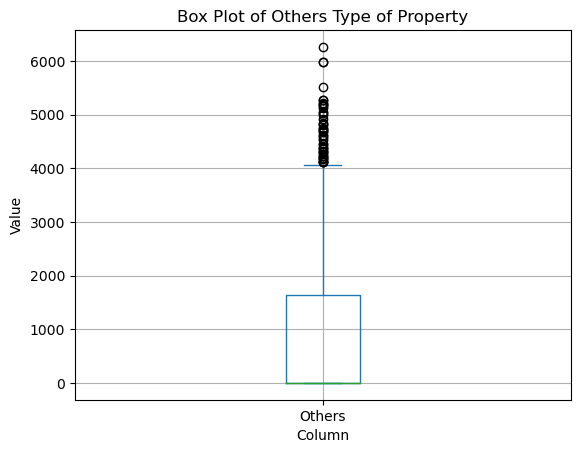

In [5]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data.plot(kind="box")
plt.title("Box Plot of Others Type of Property")
plt.xlabel("Column")
plt.ylabel("Value")
plt.grid(True)

# Display the plot
plt.show()

In [6]:
# Ensure the data is in monthly frequency
#data = data.resample('M').sum()

In [7]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data, model='additive')

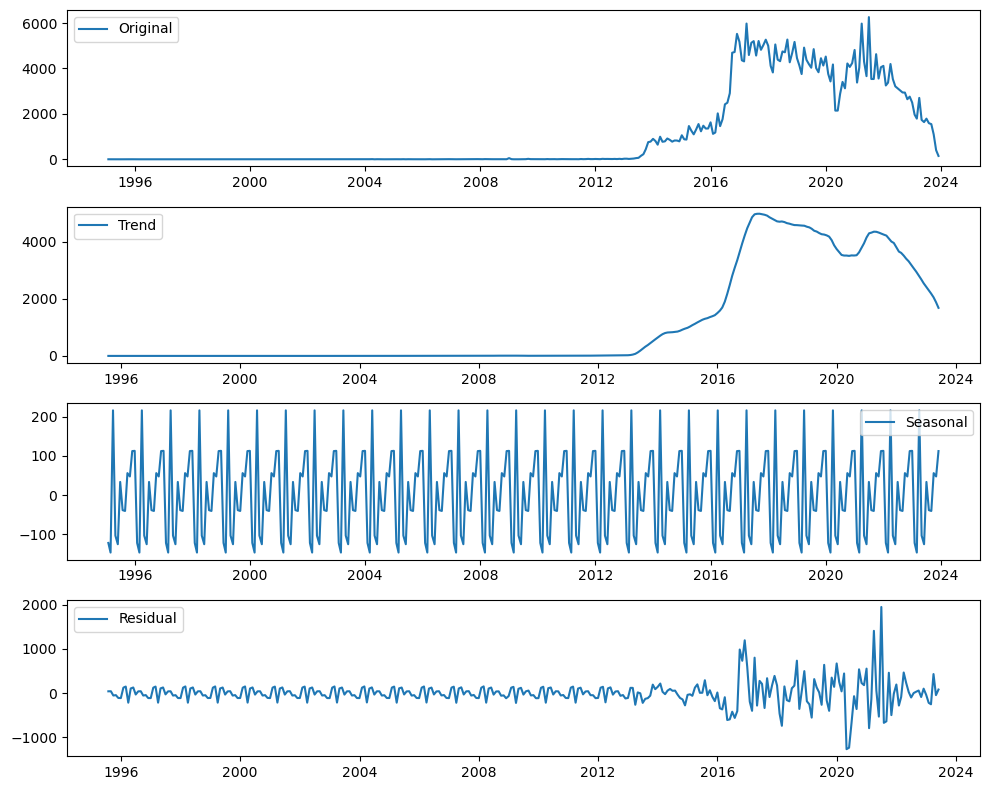

In [8]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# ARIMA model
model = ARIMA(data, order=(5,1,0))
results = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [8]:
# Predictions
n_periods = 12  # number of periods to forecast
forecast = results.forecast(steps=n_periods)

In [9]:
print(forecast)

2023-12-31    330.782563
2024-01-31     98.302987
2024-02-29      6.210961
2024-03-31    119.640169
2024-04-30     35.388287
2024-05-31      3.693145
2024-06-30     57.973116
2024-07-31     24.546113
2024-08-31     12.829598
2024-09-30     37.250529
2024-10-31     23.337273
2024-11-30     18.737977
Freq: M, Name: predicted_mean, dtype: float64


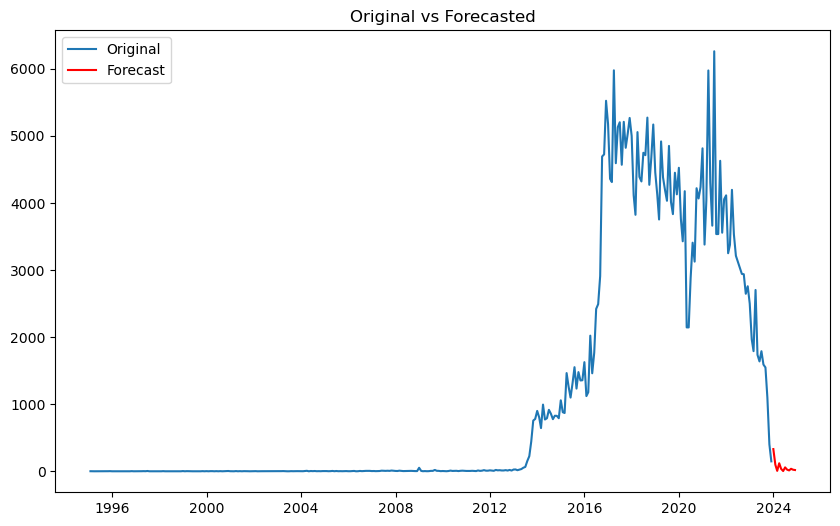

In [10]:
# Plotting original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Others - Original vs Forecasted using ARIMA')
plt.legend()
plt.show()
